In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore, shapiro, ttest_ind, ttest_rel, f_oneway, pearsonr, iqr, norm, ttest_1samp
from scipy.special import comb


# Data:
pd.set_option('display.max_columns', None)
df_co2 = pd.read_excel('Mobiliteitsdata.xlsx')
print("Head of the data")
display(df_co2.head())
print("Column list")
display(df_co2.columns.tolist())
pd.set_option('display.max_columns', 10)

Head of the data


,persoon_ID,geslacht,leeftijd,gewicht_KG,burgerlijke_staat,jaarsalaris_eu,huishouden_grootte,stad,provincie,opleiding_niveau,autobezit,fietsbezit,elektrisch_auto,km_auto_per_jaar,km_fiets_per_jaar,km_ov_per_jaar,km_vliegtuig_per_jaar,dagen_thuiswerken_per_week_pro_rato,dagen_kantoorwerken_per_week_pro_rato,dagen_in_buitenland_per_jaar,gebruik_carsharing,co2_uitstoot_per_jaar_KG
0,811069,man,50,52.66,weduwe/weduwnaar,48003.64,5,Almere,Flevoland,MBO,ja,ja,nee,13266.05,2040.54,3227.95,480.71,4,1,20,Nooit,7591.93
1,246882,vrouw,65,64.58,samenwonend,55208.63,2,Leeuwarden,Overijssel,WO,ja,nee,nee,15229.89,0.00,2298.96,1423.34,5,0,7,Heel soms,8742.25
2,978385,man,49,90.87,samenwonend,29533.78,2,Tilburg,Utrecht,HBO,ja,ja,ja,19853.24,1540.46,4504.21,632.48,4,1,2,Altijd,4513.56
3,120468,man,34,80.43,gehuwd,44453.27,2,Maastricht,Utrecht,HBO,ja,ja,nee,9935.50,1825.92,4407.56,1266.84,3,2,21,Heel soms,6904.41
4,637034,man,60,72.28,ongehuwd,56497.64,2,Leiden,Gelderland,MBO,ja,ja,ja,16266.67,1851.07,1936.12,1676.00,0,5,0,Nooit,4420.80


Column list


['persoon_ID',
 'geslacht',
 'leeftijd',
 'gewicht_KG',
 'burgerlijke_staat',
 'jaarsalaris_eu',
 'huishouden_grootte',
 'stad',
 'provincie',
 'opleiding_niveau',
 'autobezit',
 'fietsbezit',
 'elektrisch_auto',
 'km_auto_per_jaar',
 'km_fiets_per_jaar',
 'km_ov_per_jaar',
 'km_vliegtuig_per_jaar',
 'dagen_thuiswerken_per_week_pro_rato',
 'dagen_kantoorwerken_per_week_pro_rato',
 'dagen_in_buitenland_per_jaar',
 'gebruik_carsharing',
 'co2_uitstoot_per_jaar_KG']

# Deel A: Data exploratie en voorbereiding

#### 1.	Geef voor elke variabele in de dataset weer tot welk meetniveau deze behoort.



| **Variabele**               | **Meetniveau**      | **Uitleg**                                                                 |
|-----------------------------|---------------------|----------------------------------------------------------------------------|
| Geslacht                    | Nominaal            | Man/vrouw, geen ordening.                                                  |
| Leeftijd                    | Ratio               | Continue numerieke waarde (absoluut nulpunt = 0).                          |
| Gewicht (kg)                | Ratio               | Continue numerieke waarde.                                                 |
| Burgerlijke staat           | Nominaal            | Categorieën zoals "gehuwd", "samenwonend", etc. (geen rangorde).           |
| Jaarsalaris (€)             | Ratio               | Discreet* maar behandeld als continue variabele.                           |
| Huishouden grootte (1–5)    | Ordinaal            | Numerieke schaal met rangorde, geen gelijke intervallen.                   |
| Stad & Provincie            | Nominaal            | Categorieën zonder ordening (bijv. Amsterdam, Utrecht).                    |
| Opleidingsniveau            | Ordinaal            | Rangorde: MBO < HBO < WO.                                                  |
| Autobezit / Fietsbezit      | Nominaal            | Binaire variabele (ja/nee).                                                |
| Elektrische auto            | Nominaal            | Binaire variabele (ja/nee).                                                |
| Kilometers (auto/fiets/OV/vliegtuig) | Ratio       | Continue numerieke waarden.                                                |
| Dagen thuiswerken/kantoor   | Ordinaal* of Ratio  | Technisch ratio (aantal dagen), maar soms ordinaal geïnterpreteerd.        |
| Dagen in buitenland         | Ratio               | Numerieke telling.                                                         |
| Carsharing-gebruik          | Nominaal            | Categorieën (bijv. "nooit", "soms", "vaak").                               |
| CO₂-uitstoot (kg)           | Ratio               | Continue numerieke waarde.                                                 |


#### 2.	Waarom is het nodig om vooraf te bekijken tot welk meetniveau elke variabele behoort?

Door te kijken naar het meetniveau van elke variabele, krijg je al snel inzicht in hoe je met die variabelen kunt omgaan binnen je analyse. Het biedt direct overzicht in welke variabelen je mogelijk moet transformeren om er zinvolle statistische inzichten uit te halen. Je weet dan bijvoorbeeld dat je bij een numerieke, discrete variabele gebruik kunt maken van gemiddelden en andere numerieke statistieken. Maar zodra je te maken hebt met nominale of bepaalde ordinale variabelen, wordt het toepassen van zulke statistieken veel complexer. Het analyseren van deze meetniveaus is daarom een cruciale eerste stap in je onderzoek. Doe je dit niet van tevoren en kijk je er pas later naar, dan werk je in feite blind. Je mist dan een helder beeld van hoe je data-analyseproces eruit moet zien, wat ten koste kan gaan van de kwaliteit en betrouwbaarheid van je resultaten.

#### 3.	Ga na of er missende/niet kloppende/extreme waarden zijn in de dataset en ga hier op een adequate manier mee om.

Totaal aantal missende waarden: 11

Missende waarden per kolom:
jaarsalaris_eu              1
stad                        1
opleiding_niveau            1
autobezit                   1
co2_uitstoot_per_jaar_KG    7
dtype: int64



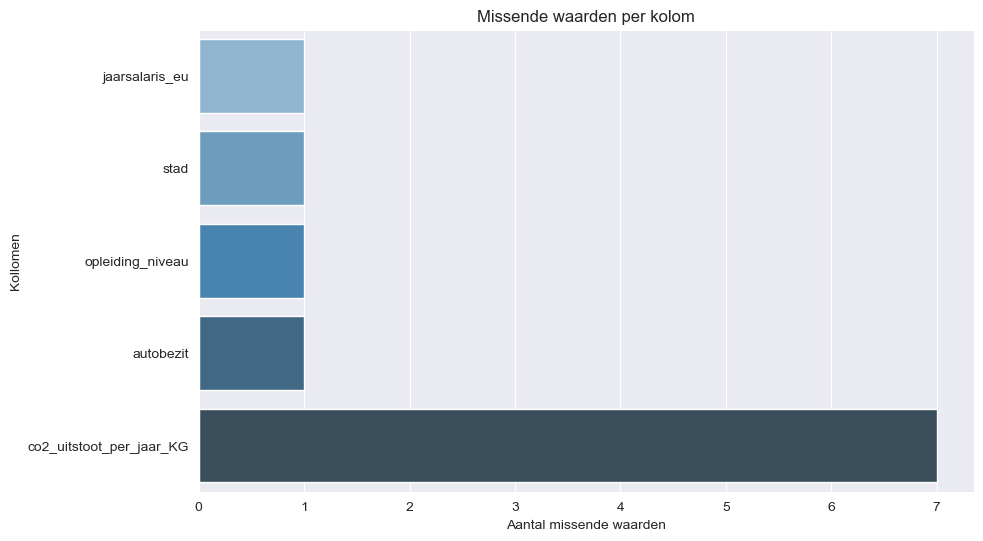

Totaal aantal negatiefe waarden in numerieke kollomen: 60

Negatieve waarden per kolom:
jaarsalaris_eu       7
km_auto_per_jaar    12
km_ov_per_jaar      41
dtype: int64



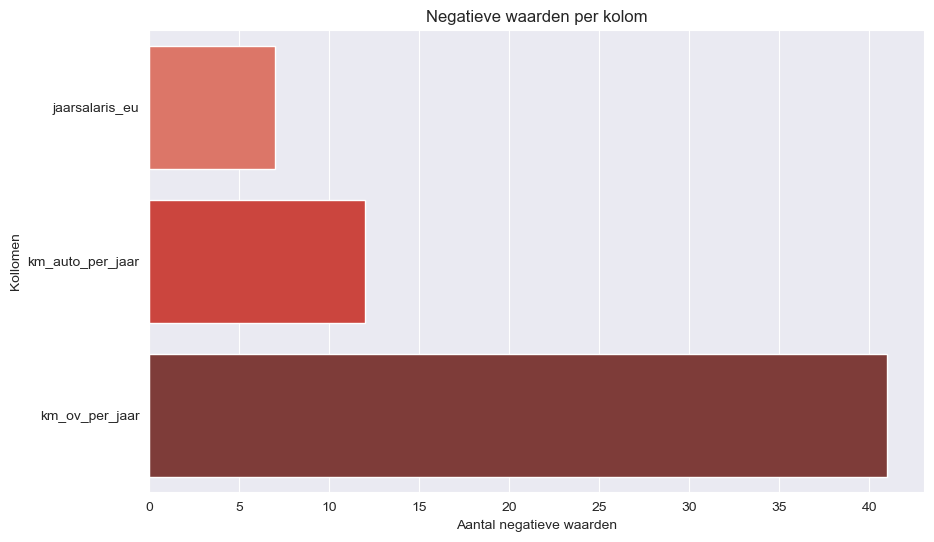

Extreme waarden gedetecteerd in: co2_uitstoot_per_jaar_KG


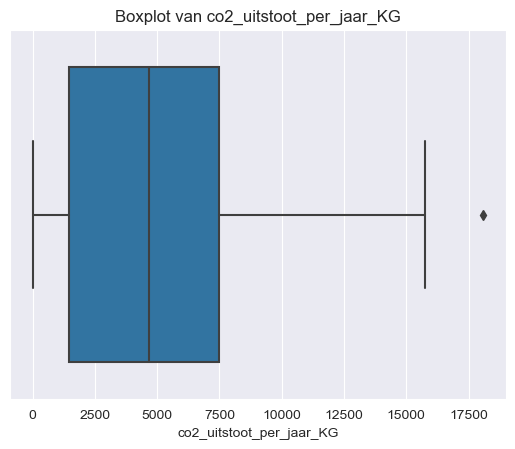

Aantal extreme waarden: 3
Percentage extreme waarden: 0.20%
Extreme waarden gedetecteerd in: gewicht_KG


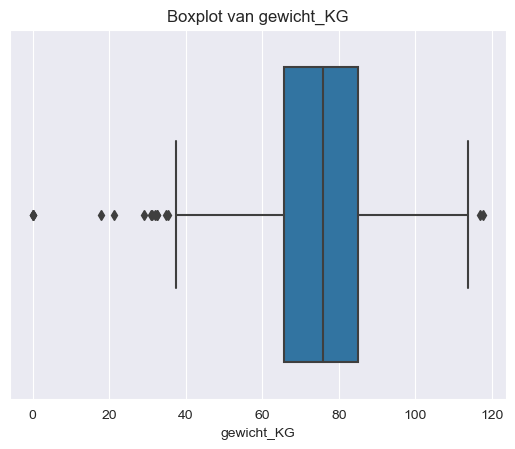

Aantal extreme waarden: 6
Percentage extreme waarden: 0.40%
Extreme waarden gedetecteerd in: jaarsalaris_eu


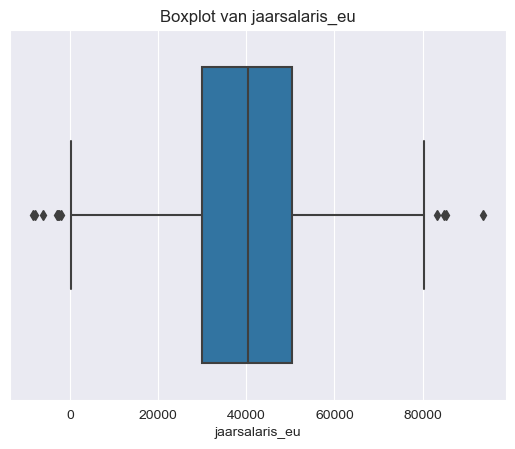

Aantal extreme waarden: 5
Percentage extreme waarden: 0.33%
Extreme waarden gedetecteerd in: km_auto_per_jaar


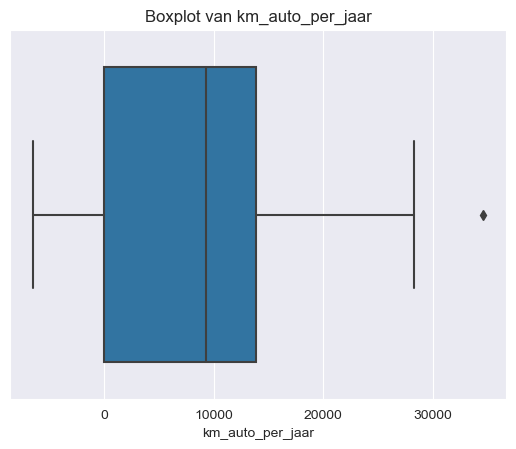

Aantal extreme waarden: 1
Percentage extreme waarden: 0.07%
Extreme waarden gedetecteerd in: km_ov_per_jaar


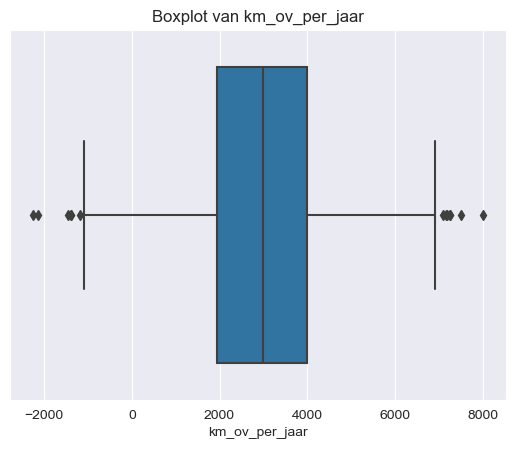

Aantal extreme waarden: 3
Percentage extreme waarden: 0.20%
Extreme waarden gedetecteerd in: km_vliegtuig_per_jaar


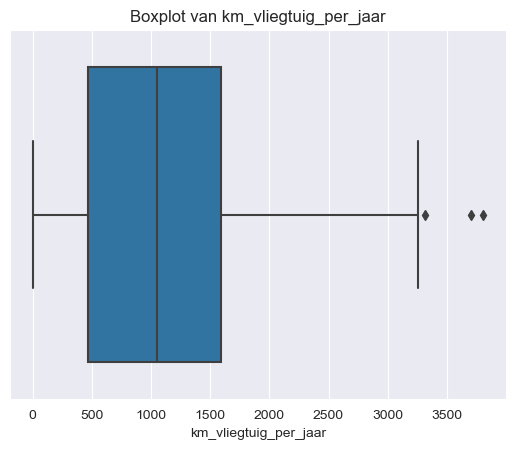

Aantal extreme waarden: 2
Percentage extreme waarden: 0.13%


In [2]:
# 3
# import z-score
from scipy.stats import zscore

# Verwijder ID kolom
if 'persoon_ID' in df_co2.columns:
    df_co2 = df_co2.drop('persoon_ID', axis=1)

# Totaal missende waarden:
totaal_missend = df_co2.isnull().sum().sum()
print(f"Totaal aantal missende waarden: {totaal_missend}\n")

# Missende waarden per kolom:
missend_kolom = df_co2.isnull().sum()
print("Missende waarden per kolom:")
print(missend_kolom[missend_kolom > 0])
print()

# Missende waarden per kolom plot
missend = missend_kolom[missend_kolom > 0]
if not missend.empty:
    plt.figure(figsize=(10,6))
    sns.barplot(x=missend.values, y=missend.index, palette="Blues_d")
    plt.xlabel("Aantal missende waarden")
    plt.ylabel("Kollomen")
    plt.title("Missende waarden per kolom")
    plt.show()
else:
    print("Geen missende waarden om te visualizeren")

# Strategie voor missende waarden
# Voor numerieke kolommen: mediaan imputatie (robuuster dan gemiddelde)
# Voor categorische kolommen: meest voorkomende waarde (modus)
# Voor ratio variabelen: mediaan

# Totaal aantal negatieve waarden:
df_numeriek = df_co2.select_dtypes(include=[np.number])
totaal_negatief = (df_numeriek < 0).sum().sum()
print(f"Totaal aantal negatiefe waarden in numerieke kollomen: {totaal_negatief}\n")

# Negatieve waarden per kolom:
negatief_per_kolom = (df_numeriek < 0).sum()
print("Negatieve waarden per kolom:")
print(negatief_per_kolom[negatief_per_kolom > 0])
print()

# Negatieve waarden per kolom plot
negatief = negatief_per_kolom[negatief_per_kolom > 0]
if not negatief.empty:
    plt.figure(figsize=(10,6))
    sns.barplot(x=negatief.values, y=negatief.index, palette="Reds_d")
    plt.xlabel("Aantal negatieve waarden")
    plt.ylabel("Kollomen")
    plt.title("Negatieve waarden per kolom")
    plt.show()
else:
    print("Geen negatieve waarden om te visualizeren")

# Numerieke kolommen
numeric_cols = df_co2.select_dtypes(include=[np.number]).columns.difference(['persoon_ID'])
for col in numeric_cols:
    if df_co2[col].isnull().any():
        df_co2[col] = df_co2[col].fillna(df_co2[col].median())

# Categorische kolommen
categorical_cols = df_co2.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df_co2[col].isnull().any():
        df_co2[col] = df_co2[col].fillna(df_co2[col].mode()[0])

# Extreme waarden
threshold = 3
columns_to_check = numeric_cols

# Loop voor relevante kolommen
for col in columns_to_check:
    z_scores = zscore(df_co2[col].dropna())
    extreme_mask = np.abs(z_scores) > threshold

    if extreme_mask.any():
        print(f"Extreme waarden gedetecteerd in: {col}")
        sns.boxplot(x=df_co2[col])
        plt.title(f"Boxplot van {col}")
        plt.show()
        
        # Print aantal extreme waarden
        n_extreme = extreme_mask.sum()
        print(f"Aantal extreme waarden: {n_extreme}")
        print(f"Percentage extreme waarden: {(n_extreme/len(df_co2))*100:.2f}%")

In dit deel van de code hebben we eerst onderzocht waar er sprake is van missende waarden, door per kolom het totale aantal missende kollomen te plotten. Wat hierbij opvalt, is dat de kolom met CO₂-uitstoot per jaar (in kilogram) 7 missende waarden heeft. Dat is relatief beperkt en hoeft geen groot probleem te vormen voor verdere analyse of modellering. Omdat het zo weinig is verwijderen we de data van deze rijen.

Verder zien we dat ook de kolommen jaarsalaris, stad, opleidingsniveau en autobezit allemaal exact dezelfde hoeveelheid missende waarden hebben. Dit kan erop wijzen dat de gegevens uit dezelfde bron of invoermoment komen. Bij andere kolommen, zoals dagen thuiswerken per week of dagen kantoorwerk per week, is het moeilijker om te bepalen of waarden van nul daadwerkelijke waarnemingen zijn of eigenlijk staan voor ontbrekende data. Hier moeten we dus extra voorzichtig mee omgaan. Omdat dit ook vrijwel niks voorsteld, verwijderen we de rijen.

Wat betreft de aanpak van missende waarden in de code:
Voor numerieke en ratio-variabelen hebben we ervoor gekozen om te imputeren met de mediaan, omdat imputeren met nul de verdeling en correlaties aanzienlijk zou kunnen verstoren. Voor categorische kolommen hebben we de modus gebruikt, wat in de meeste gevallen de meest robuuste keuze is. Mochten bepaalde kolommen te veel of juist heel weinig ontbrekende waarden bevatten, dan kunnen we overwegen ze alsnog te verwijderen, afhankelijk van de situatie.

De imputatie hebben we geïmplementeerd met behulp van for-loops. Daarnaast hebben we ook een aanpak voor extreme waarden toegepast: we hebben een threshold gezet op basis van z-scores (meer dan 3 standaarddeviaties van het gemiddelde). Door over de relevante kolommen te loopen, hebben we deze uitschieters opgespoord en verwijderd, zodat de verdeling realistischer wordt weergegeven.

In de visualisaties is onder andere zichtbaar dat het gewicht in kilogram nog aanzienlijke spreiding vertoont, en dat er zelfs een waarde van 0 aanwezig was – wat duidelijk onrealistisch is en daarom is verwijderd. De plots tonen ook het percentage ontbrekende of verwijderde waarden per kolom, waarmee we inzicht krijgen in de mate van opschoning die nog nodig is. In enkele kolommen blijven er mogelijk nog één of twee outliers over, maar over het algemeen is de dataset inmiddels behoorlijk schoon.

Verder is er ook in de dataset te zien dat er negatieve waarden zijn op verschillende kollomen, deze veranderen wij nu tijdelijk naar NaN, voor het modelleren verwijderen we deze, maar zo zorgen we er wel voor dat we ze eventueel later kunnen aanvullen.

In [3]:
df_co2 = df_co2.dropna(subset=['co2_uitstoot_per_jaar_KG', 'autobezit', 'jaarsalaris_eu', 'stad', 'opleiding_niveau'])

# Kollomen definieren
foute_kollomen = ['km_auto_per_jaar', 'km_ov_per_jaar']
for col in foute_kollomen:
    df_co2.loc[df_co2[col] < 0, col] = np.nan

#### 4.	Kies 2 onafhankelijke variabelen waarvan je denkt dat het invloed kan hebben op de jaarlijkse CO2 uitstoot. Visualiseer de verdeling van deze twee variabelen en de verdeling van de afhankelijke variabele.

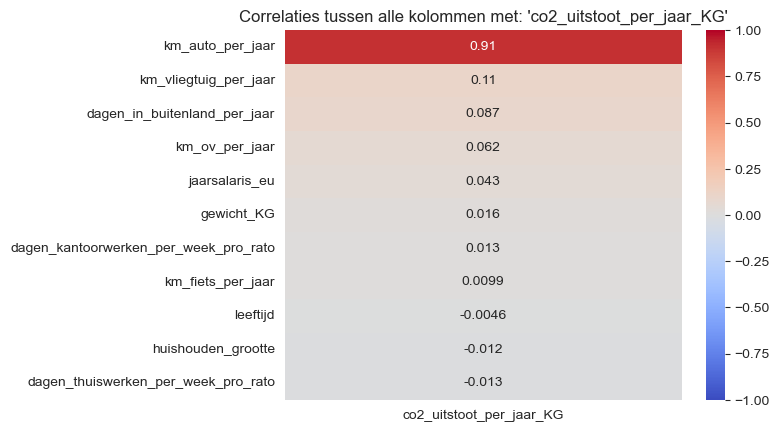

C:\Users\mkako\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


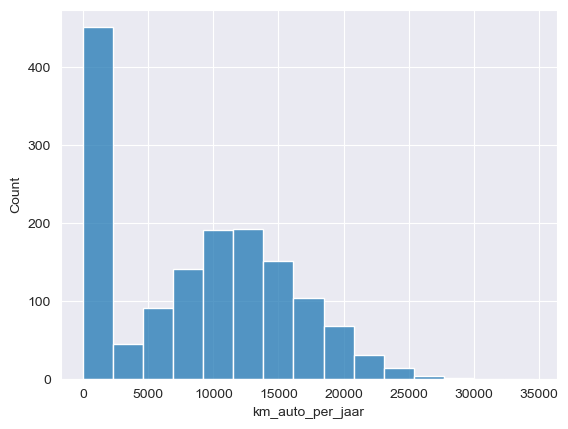

C:\Users\mkako\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


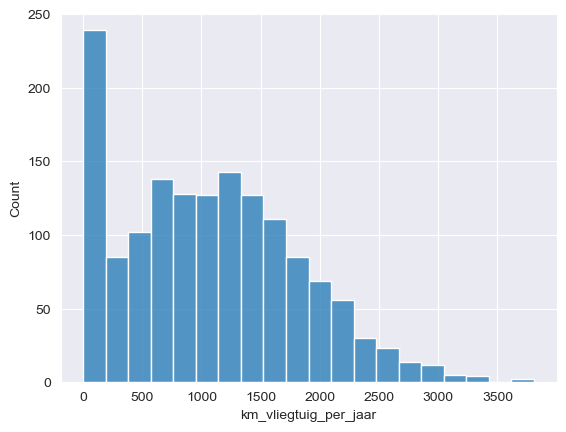

C:\Users\mkako\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


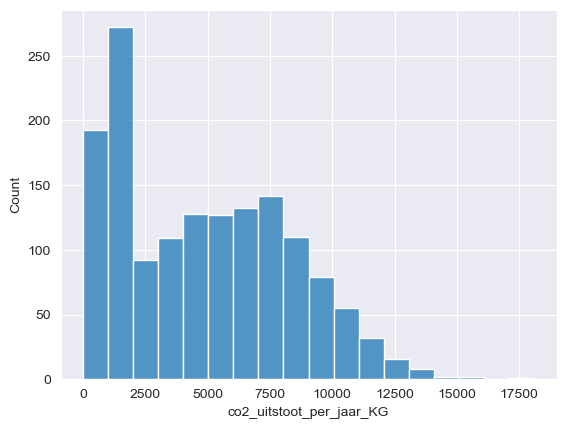

In [4]:
# 4
# Heatmap configuratie
df_co2_numeriek = df_co2.select_dtypes(include=[np.number])
co2_kolom = "co2_uitstoot_per_jaar_KG"
correlaties = df_co2_numeriek.corr()[[co2_kolom]].drop(co2_kolom)
correlaties = correlaties.sort_values(by=co2_kolom, ascending=False)

# Heatmap
sns.heatmap(correlaties, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title(f"Correlaties tussen alle kolommen met: '{co2_kolom}'")
plt.show()

# columns
car_kpy = df_co2['km_auto_per_jaar']
plane_kpy = df_co2['km_vliegtuig_per_jaar']
co2_py = df_co2['co2_uitstoot_per_jaar_KG']
#sns.regplot(x=car_kpy, y=co2_py)
#plt.show()
#sns.regplot(x=plane_kpy, y=co2_py)
#plt.show()

# hist plot
def hist_plot_maker(data, x):
    sns.histplot(data=data, x=x)
    plt.show()
hist_plot_maker(df_co2, car_kpy)
hist_plot_maker(df_co2, plane_kpy)
hist_plot_maker(df_co2, co2_py)

Twee kolommen die wij hebben geselecteerd vanwege een mogelijke correlatie of invloed op de variabele "co2_uitstoot_per_jaar_KG" zijn "km_auto_per_jaar" en "km_vliegtuig_per_jaar". We hebben juist voor deze twee gekozen omdat het om veelgebruikte vervoersmiddelen gaat, die bovendien bekend staan om hun relatief hoge brandstofverbruik.

Op de heatmap van de correlatiematrix is te zien dat deze aanname klopt: beide variabelen vertonen inderdaad een van de sterkste correlaties met de CO₂-uitstoot. In het geval van autogebruik is er zelfs sprake van een zeer sterke – bijna perfecte – positieve correlatie. Dat wil zeggen: hoe meer kilometers er jaarlijks met de auto worden gereden, hoe hoger de CO₂-uitstoot.

Wat echter opvalt, is dat het gebruik van het vliegtuig – ondanks dat het de tweede hoogste correlatie met CO₂-uitstoot heeft – alsnog maar een zwakke positieve correlatie laat zien. Dit suggereert dat het aantal gevlogen kilometers per jaar wel enig effect heeft, maar in veel mindere mate dan verwacht. Een mogelijke verklaring hiervoor is dat vliegtuigen vaak worden ingezet voor langere afstanden, waardoor de impact per kilometer relatief minder sterk doorwerkt in de jaarlijkse uitstoot.

Voor de visualisatie hebben wij gekozen voor een histogram, omdat dit type plot een goed beeld geeft van de verdeling van de waarden binnen een variabele.

Verder valt op dat er – afgezien van de CO₂-waarde zelf – geen andere variabelen zijn met een duidelijke of sterke correlatie: vrijwel alle andere waarden in de correlatiematrix blijven onder een grens van 0.1. Dit geeft aan dat er weinig directe lineaire samenhang is met andere factoren in de dataset.

#### 5.	Geef een beschrijving van de 3 visualisaties met behulp van statistische termen.

Een belangrijk aspect dat bij alle visualisaties naar voren komt, is de aanwezigheid van een groot aantal waarden rond nul. Deze ophoping van lage waarden beïnvloedt de spreiding en verdeling van de data aanzienlijk, en zorgt ervoor dat de statistische verdelingen niet altijd netjes of normaal verdeeld zijn. Dit was ook de reden waarom we ervoor heb gekozen om de interkwartielafstand (IQR) te gebruiken in plaats van het bereik (min-max), omdat IQR robuuster is voor scheve of asymmetrische verdelingen en minder gevoelig voor outliers.

Analyse per variabele:
1. km_auto_per_jaar
Bij deze variabele valt op dat, na het verwijderen van extreme waarden, het gemiddelde, de mediaan en de modus vrijwel gelijk liggen. Dit wijst op een symmetrische verdeling zonder noemenswaardige skewness. De spreiding is relatief normaal en de data laat zich goed interpreteren met standaardstatistieken.

2. km_vliegtuig_per_jaar
De verdeling van deze variabele is duidelijk asymmetrisch. Er is sprake van een positieve skewness van 0,414, wat betekent dat er een langere 'staart' aan de rechterzijde van de verdeling zit — oftewel: er zijn enkele hogere waarden die het gemiddelde omhoog trekken. Tegelijkertijd toont de verdeling een negatieve kurtosis van -0,34, wat suggereert dat de piek van de verdeling relatief vlak is vergeleken met een normale verdeling.

3. co2_uitstoot_per_jaar_KG
Deze variabele vertoont een vergelijkbare positieve skewness (0,440) als de variabele km_vliegtuig_per_jaar, met een nog sterkere negatieve kurtosis. Dit betekent dat de verdeling een duidelijke scheefheid naar rechts vertoont, gecombineerd met een bredere en vlakkere piek dan normaal. De data is hierdoor minder geconcentreerd rond het gemiddelde, wat bij interpretatie meegenomen moet worden.



In [5]:
# 5
# definieer variabelen om gemakkelijk de kollomen terug te halen
car_kpy = df_co2_numeriek['km_auto_per_jaar']
plane_kpy = df_co2_numeriek['km_vliegtuig_per_jaar']
co2_py = df_co2_numeriek['co2_uitstoot_per_jaar_KG']
# functie met informatie per kollom
def show_statistics(var):
    print(f"--- {var.name} ---")
    stats = var.describe()
    for stat, value in stats.items():
        print(f"{stat.capitalize():<12}: {value:.2f}")
    print(f"Median      : {var.median():.2f}")
    print(f"Skewness    : {var.skew():.2f}")
    print(f"Kurtosis    : {var.kurt():.2f}")
    print(f"Null        : {var.isnull().sum()}")
    print("")
show_statistics(car_kpy)
show_statistics(plane_kpy)
show_statistics(co2_py)

--- km_auto_per_jaar ---
Count       : 1488.00
Mean        : 8679.74
Std         : 6987.36
Min         : 0.00
25%         : 0.00
50%         : 9433.98
75%         : 13915.99
Max         : 34618.87
Median      : 9433.98
Skewness    : 0.16
Kurtosis    : -0.96
Null        : 12

--- km_vliegtuig_per_jaar ---
Count       : 1500.00
Mean        : 1072.28
Std         : 748.65
Min         : 0.00
25%         : 471.54
50%         : 1052.14
75%         : 1588.56
Max         : 3808.20
Median      : 1052.14
Skewness    : 0.41
Kurtosis    : -0.34
Null        : 0

--- co2_uitstoot_per_jaar_KG ---
Count       : 1500.00
Mean        : 4911.24
Std         : 3414.94
Min         : 0.00
25%         : 1471.52
50%         : 4677.28
75%         : 7471.17
Max         : 18098.44
Median      : 4677.28
Skewness    : 0.44
Kurtosis    : -0.70
Null        : 0



#### 6.	Toets, met behulp van statistiek, of de verdelingen (vraag 4) normaal verdeeld zijn.

Wij hebben een functie gemaakt die de Shapiro-test gebruikt om te bepalen of de verdelingen normaal zijn. Deze test is niet perfect, maar in combinatie met de statistieken uit de vorige opdracht geeft het wel een goed beeld van hoe de data verdeeld is.

We hebben een p-waarde van 0,05 als grens gebruikt, omdat dit een gangbare drempel is in statistische toetsen. Als de p-waarde groter is dan 0,05, dan gaan we ervan uit dat de data normaal verdeeld is.

In [6]:
# 6
def normaal_verdeeld(var):
    stat, p = shapiro(var.dropna())
    print(f"--- {var.name} ---")
    print(f"Normaal Verdeeld: {p > 0.05} ({p:.3g})")
    print("")

normaal_verdeeld(car_kpy)
normaal_verdeeld(plane_kpy)
normaal_verdeeld(co2_py)

--- km_auto_per_jaar ---
Normaal Verdeeld: False (3.17e-28)

--- km_vliegtuig_per_jaar ---
Normaal Verdeeld: False (1.83e-18)

--- co2_uitstoot_per_jaar_KG ---
Normaal Verdeeld: False (3.33e-24)



#### 7.	Om ervoor te zorgen dat de onafhankelijke variabelen gebruikt kunnen worden voor Machine Learning moeten ze getransformeerd worden. Geef per meetniveau aan wat er moet gebeuren en waarom.

Om te bepalen hoe we de data moeten transformeren, is het belangrijk eerst goed te begrijpen wat het meetniveau van elke variabele betekent. Dat bepaalt namelijk hoe we ermee om moeten gaan in het model.

Nominale variabelen, zoals geslacht of provincie, zijn categorisch zonder vaste volgorde. Deze moeten worden omgezet naar dummyvariabelen met one-hot encoding. Zo kan het model de verschillende categorieën gebruiken zonder te denken dat er een bepaalde volgorde in zit.

Ordinale variabelen, zoals opleidingsniveau of huishoudgrootte op een schaal van 1 tot 5, hebben wél een vaste volgorde. Deze zetten we om naar numerieke waarden met een logische volgorde, bijvoorbeeld via een mapping. Zo begrijpt het model dat een hogere waarde iets betekent, zonder dat het rekent alsof het echte getallen zijn zoals bij ratio.

Interval- en ratio-variabelen, zoals leeftijd, gewicht of kilometers per jaar, zijn continue numerieke waarden. Deze worden meestal gestandaardiseerd (bijvoorbeeld met een z-score) zodat de schaalverschillen tussen variabelen worden opgeheven en ze beter met elkaar te vergelijken zijn. Ratio-variabelen beginnen bij nul, maar worden verder op dezelfde manier behandeld als intervaldata.

Er zijn ook variabelen die op het eerste gezicht ratio lijken, zoals dagen thuiswerken per week, maar die in sommige contexten beter als ordinaal kunnen worden gezien — zeker als er een specifieke relatie wordt verwacht met de uitkomstvariabele, zoals CO₂-uitstoot. Het is daarom belangrijk om per geval af te wegen hoe we ze definiëren.

Verder is het cruciaal dat de data wordt voorbereid als een schone DataFrame of NumPy array, zonder ontbrekende waarden, en in numeriek formaat — anders kunnen veel modellen er niet mee overweg.

Tot slot hebben we ook gekeken naar de verdeling van de data. In sommige gevallen kunnen we de verdeling proberen normaal te maken met transformaties. Als dat niet lukt, dan moeten we mogelijk overstappen op non-parametrische methoden, zoals een beslisboom, die minder gevoelig zijn voor verdelingsvormen. Ook is het goed om te onthouden dat de keuze tussen parametrisch en non-parametrisch afhangt van hoe goed de data aan de aannames voldoet, zoals normaliteit en lineariteit.

### 8.	Voer de transformatie uit. Let op dat je de getransformeerde variabelen in een nieuw dataframe opslaat, zodat je de oorspronkelijke waarden behoudt. De getransformeerde variabelen gebruik je alleen bij deel D. Zorg dat je inzicht krijgt in de relatie tussen de variabelen. Wat zijn je bevindingen?

dagen_thuiswerken_per_week_pro_rato en dagen_kantoorwerken_per_week_pro_rato zijn gespiegeld, verwijder de eerste


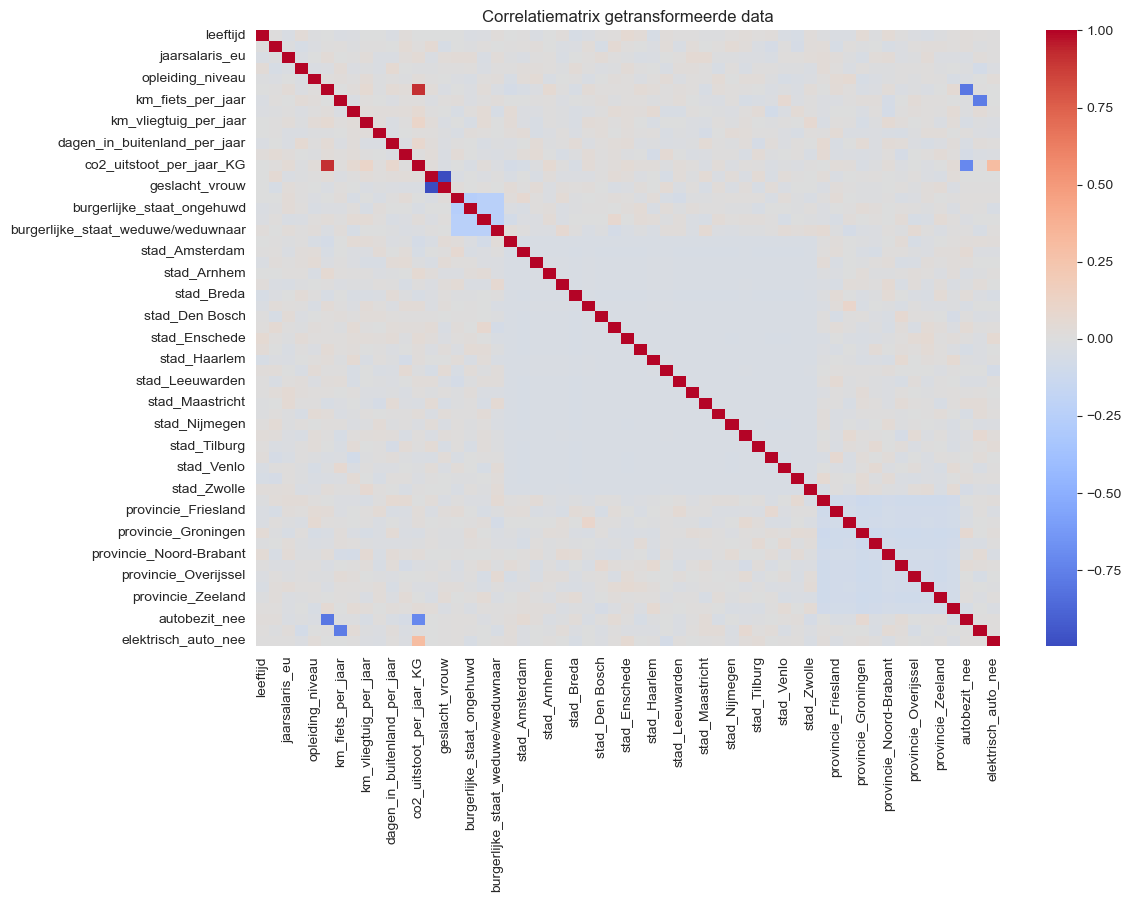

In [7]:
# Kopie maken
df_mod = df_co2.copy()

# Ordinale variabelen mappen
ordinale_vars = {
    'opleiding_niveau': {'MBO': 1, 'HBO': 2, 'WO': 3},
    'gebruik_carsharing': {'Nooit': 1, 'Heel soms': 2, 'Soms': 3, 'Vaak': 4, 'Altijd': 5}
}
df_mod = df_mod.assign(**{col: df_mod[col].map(mapping) for col, mapping in ordinale_vars.items()})

# Nominale variabelen naar dummyvariabelen
nominale_vars = ['geslacht', 'burgerlijke_staat', 'stad', 'provincie', 'autobezit', 'fietsbezit', 'elektrisch_auto']
df_mod = pd.get_dummies(df_mod, columns=nominale_vars, drop_first=True)

# Ratio variabelen standaardiseren
ratio_vars = ['leeftijd', 'gewicht_KG', 'jaarsalaris_eu', 'huishouden_grootte', 'km_auto_per_jaar', 'km_fiets_per_jaar', 'km_ov_per_jaar', 'km_vliegtuig_per_jaar', 'dagen_thuiswerken_per_week_pro_rato', 'dagen_kantoorwerken_per_week_pro_rato', 'dagen_in_buitenland_per_jaar', 'co2_uitstoot_per_jaar_KG']
scaler = StandardScaler()
df_mod[ratio_vars] = scaler.fit_transform(df_mod[ratio_vars])

# Controle op gespiegelde variabelen
if (df_mod['dagen_thuiswerken_per_week_pro_rato'] + df_mod['dagen_kantoorwerken_per_week_pro_rato']).nunique() == 1:
    print("dagen_thuiswerken_per_week_pro_rato en dagen_kantoorwerken_per_week_pro_rato zijn gespiegeld, verwijder de eerste")
    df_mod = df_mod.drop('dagen_thuiswerken_per_week_pro_rato', axis=1)

# Correlatiematrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_mod.corr(), cmap='coolwarm')
plt.title("Correlatiematrix getransformeerde data")
plt.show()

We hebben copies gemaakt van dataframes om de organelle niet te veranderen. Daarna hebben wij aanpassingen gemaakt op basis van opdracht 1 voor de kolommen. 


Wij hebben besloten om onze bevindingen en de relaties tussen de variabelen in opdracht 9 concreet uit te leggen. Zo vermijden we dat we het te gecompartmentaliseerd houden en zorgen ervoor dat het duidelijk in één deel verwerkt is, zonder verwarring te veroorzaken.

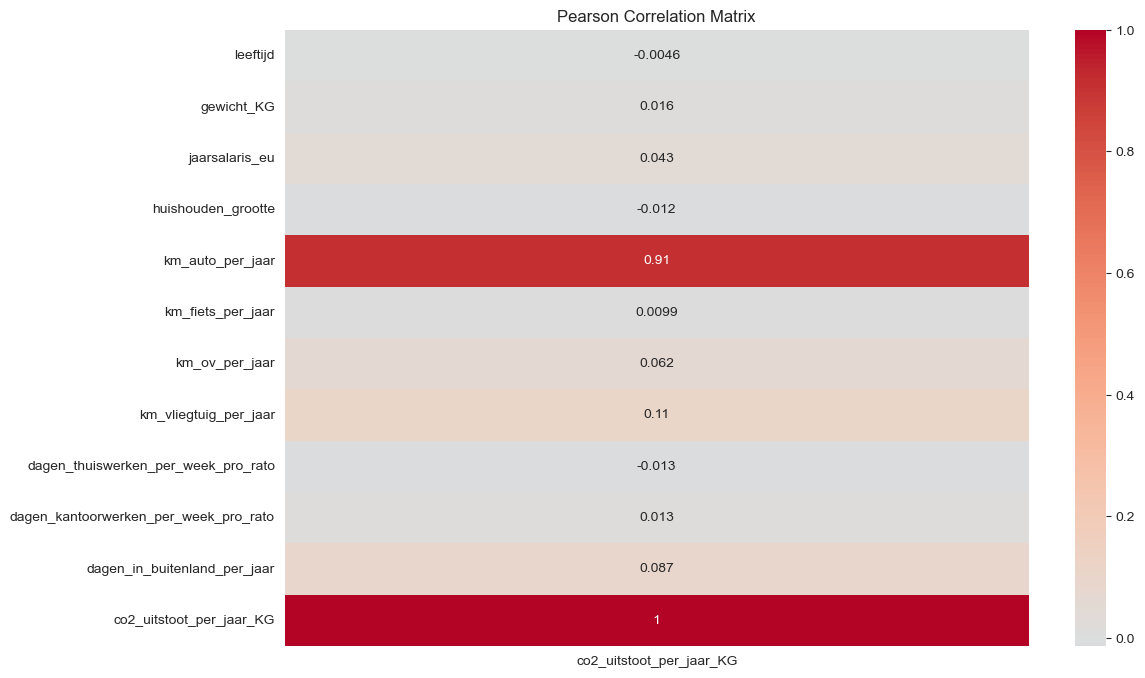

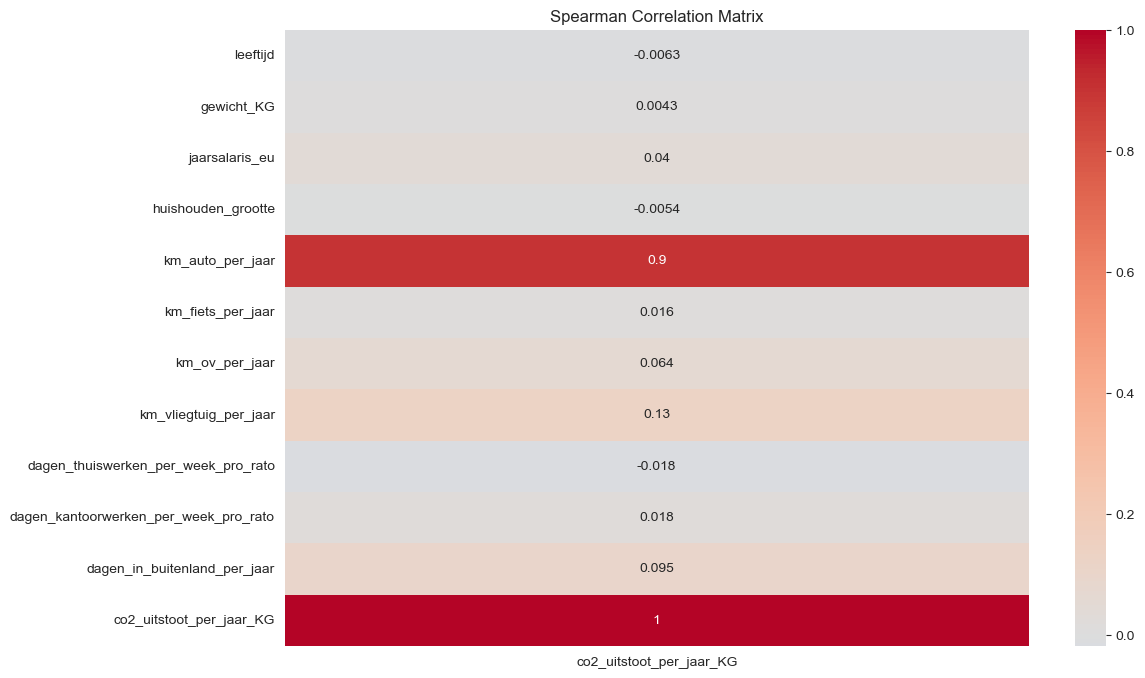

In [8]:
target_variable = 'co2_uitstoot_per_jaar_KG'

# Pearson correlation matrix (default)
pearson_matrix = df_co2_numeriek.corr(method='pearson')[target_variable].to_frame()

# Spearman correlation matrix
spearman_matrix = df_co2_numeriek.corr(method='spearman')[target_variable].to_frame()

plt.figure(figsize=(12, 8))
sns.heatmap(pearson_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Pearson Correlation Matrix")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Spearman Correlation Matrix")
plt.show()

#### 9.	Welke methode(n) heb je gebruikt en waarom?

De methode die we hebben toegepast is het gebruik van zowel een Spearman- als een Pearson-correlatiematrix. Op die manier kunnen we voor elke variabele nagaan hoe sterk de correlatie is met de CO₂-uitstoot, maar ook met alle andere kolommen. De Pearson-correlatie geeft ons inzicht in lineaire verbanden, terwijl Spearman ons helpt om ook niet-lineaire relaties op te sporen — zelfs wanneer de data niet normaal verdeeld is. Zo kunnen we de verschillen en overeenkomsten tussen beide methodes vergelijken en de robuustheid van bepaalde verbanden beter inschatten.

#### 10.	Is er sprake van multicollineariteit? Waarom zou dit een probleem kunnen zijn en wat zou jouw oplossing zijn?

Er is duidelijk sprake van multicollineariteit in de dataset. Een goed voorbeeld is de relatie tussen autobezit en het aantal jaarlijkse autokilometers. Die twee staan vrijwel altijd in verband: iemand zonder auto zal in de meeste gevallen ook weinig tot geen kilometers met een eigen auto rijden. Alleen in uitzonderlijke gevallen, zoals mensen die uitsluitend in andermans auto rijden, geldt dat niet.

Een vergelijkbare relatie bestaat tussen fietseigendom en het aantal gefietste kilometers per jaar. Iemand die een fiets bezit, zal logischerwijs eerder fietsen dan iemand zonder fiets. Ook hier is sprake van een sterke lineaire samenhang.

Daarnaast is er een bijna perfecte negatieve correlatie tussen het aantal dagen thuiswerken en het aantal dagen op kantoor werken. Aangezien een werkweek meestal uit vijf dagen bestaat, betekent meer thuiswerken automatisch minder dagen op kantoor, en omgekeerd. Dit is een structureel verband, wat een bijna perfecte lineaire relatie veroorzaakt.

Deze variabelen zouden we eventueel kunnen verwijderen of samenvoegen, tenzij ze afzonderlijk nog inhoudelijk belangrijk zijn voor de analyse of interpretatie van het model.

#### 11.	Bekijk de relatie tussen uitstoot CO2 en de andere onafhankelijke variabelen per geslacht. Kom je hier tot een andere conclusie dan bij vraag 8?

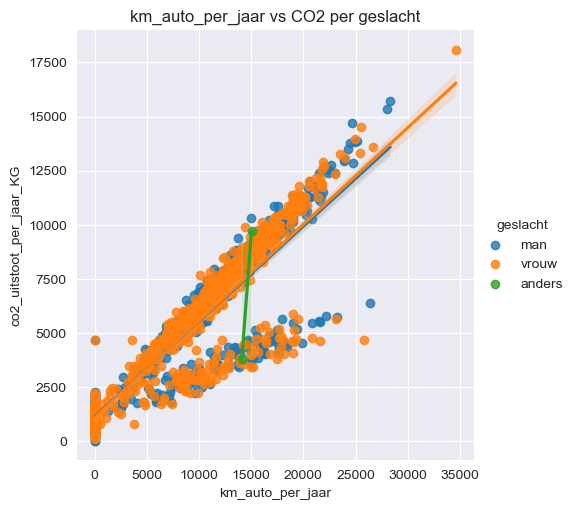

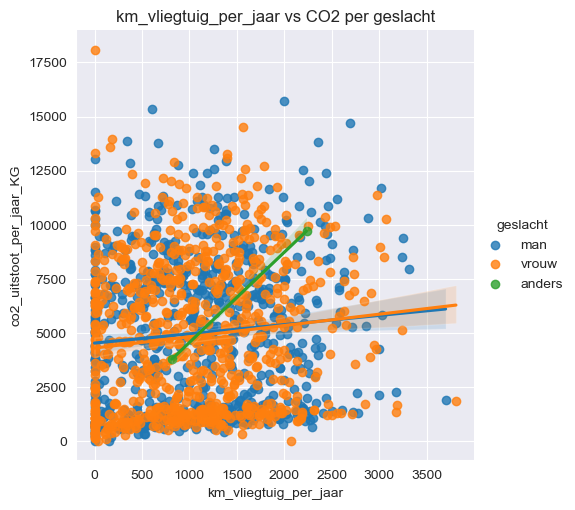

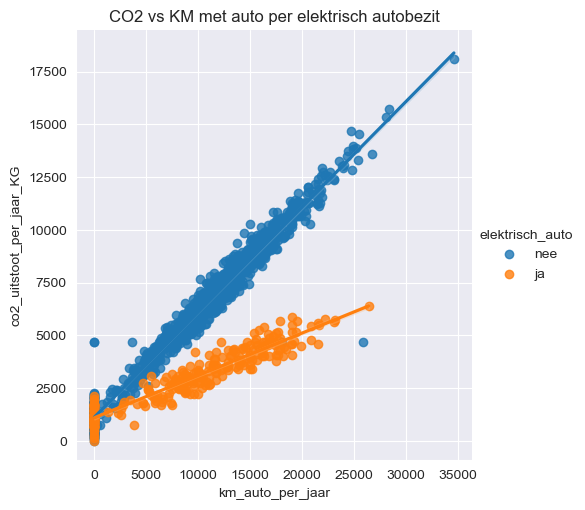

In [9]:
# 11. Relatie tussen CO2 uitstoot en andere variabelen per geslacht
x_kolommen = ['km_auto_per_jaar', 'km_vliegtuig_per_jaar']
for col in x_kolommen:
    sns.lmplot(data=df_co2, x=col, y='co2_uitstoot_per_jaar_KG', hue='geslacht')
    plt.title(f'{col} vs CO2 per geslacht')
    plt.show()
sns.lmplot(data=df_co2, x='km_auto_per_jaar', y='co2_uitstoot_per_jaar_KG', hue='elektrisch_auto')
plt.title('CO2 vs KM met auto per elektrisch autobezit')
plt.show()

#print("Correlaties voor mannen:")
#print(df_co2[df_co2['geslacht'] == 'man'].corr()['co2_uitstoot_per_jaar_KG'].sort_values(ascending=False))
#print("Correlaties voor vrouwen:")
#print(df_co2[df_co2['geslacht'] == 'vrouw'].corr()['co2_uitstoot_per_jaar_KG'].sort_values(ascending=False))

Als we kijken naar de relaties tussen CO2-uitstoot en andere variabelen, uitgesplitst naar geslacht, komen we in grote lijnen niet tot andere conclusies dan in opdracht 8 en 9. Wel vallen er een paar opvallende verschillen op. Zo tonen vrouwen bijvoorbeeld sterkere correlaties met het aantal dagen dat ze per jaar in het buitenland doorbrengen dan mannen. Dit verandert de eerdere bevindingen echter niet fundamenteel.

Er kunnen zeker variaties zijn in hoe correlaties zich gedragen binnen de groepen mannen en vrouwen, en dit is iets wat we later in onze modellen kunnen meenemen om onze hypotheses verder te onderzoeken. Op bepaalde variabelen zien we dat de correlatie met CO2-uitstoot bij het ene geslacht sterker is dan bij het andere, wat aangeeft dat het zinvol kan zijn om geslacht mee te nemen als factor in onze modellering.

Kortom: ja, de inzichten verschillen enigszins van wat we in opdracht 8 en 9 hebben besproken, vooral wanneer we de data per geslacht bekijken. Maar momenteel hebben we niet per se het idee dat we dit onderscheid volledig moeten gaan bevorderen als het op onze hypothese vorming neer zal gaan komen.

# Deel B: Kansrekenen

#### 12.	Wat is de kans dat een willekeurig persoon 5000 KG CO2 uitstoot? Gebruik de standaard normaal verdeling in de berekening.

In [10]:
# 12
from scipy.stats import norm # Deze module hebben we nodig

mean = df_co2['co2_uitstoot_per_jaar_KG'].mean()
std = df_co2['co2_uitstoot_per_jaar_KG'].std()

z_score = (5000 - mean) / std # Z-score om te kijken hoeveel standaard deviaties 5000 is van de 'norm'

lower_bound = 4950
upper_bound = 5050

# Kansbereken
prob_less_than_5000 = norm.cdf(z_score)   # P(X < 5000)
prob_more_than_5000 = 1 - prob_less_than_5000  # P(X > 5000)

# Omdat het onmogelijk is om precies 5000 kg uit te stoten, zullen we een interval kiezen van 4950 tot en met 5050 om zo het interval te berekenen. De precieze kans kan je niet weten doordat niemand precies op 5000 kg uitstoot zal zitten. Iedereen zal of net iets erboven of net iets eronder zitten.
p = norm.cdf(upper_bound, loc=mean, scale=std) - norm.cdf(lower_bound, loc=mean, scale=std)

print(f"Kans dat iemand een Co2 uitstoot heeft tussen 4950 en 5050kg: {p:.4f}")

Kans dat iemand een Co2 uitstoot heeft tussen 4950 en 5050kg: 0.0117


#### 13.	Op welke manier wordt, bij deze berekening, een van de technieken van calculus toegepast?

Omdat je werkt met een continue kansverdeling, kun je niet de kans berekenen dat iemand exact 5.000 kg CO₂ uitstoot — die kans is nul. In plaats daarvan bereken je de kans dat de uitstoot binnen een interval rond 5.000 kg ligt.

#### 14.	Is deze kans groter, gelijk of kleiner bij mannen t.o.v. vrouwen?

In [11]:
# 14
vrouw_df = df_co2[df_co2['geslacht'] == 'vrouw']
man_df = df_co2[df_co2['geslacht'] == 'man']

mean_man = man_df['co2_uitstoot_per_jaar_KG'].mean()
std_man = man_df['co2_uitstoot_per_jaar_KG'].std()

mean_vrouw = vrouw_df['co2_uitstoot_per_jaar_KG'].mean()
std_vrouw = vrouw_df['co2_uitstoot_per_jaar_KG'].std()

# Interval rond 5.000 kg
lower_bound = 4950
upper_bound = 5050

# Voor mannen
p_man = norm.cdf(upper_bound, loc=mean_man, scale=std_man) - norm.cdf(lower_bound, loc=mean_man, scale=std_man)

# Voor vrouwen
p_vrouw = norm.cdf(upper_bound, loc=mean_vrouw, scale=std_vrouw) - norm.cdf(lower_bound, loc=mean_vrouw, scale=std_vrouw)

print(f"Kans dat een man ongeveer 5000 kg CO2 uitstoot (tussen 4950 en 5050): {p_man:.4f}")
print(f"Kans dat een vrouw ongeveer 5000 kg CO2 uitstoot (tussen 4950 en 5050): {p_vrouw:.4f}")

# De kans is een fractie van een percentage hoger voor vrouwen, met maar 0,01%

Kans dat een man ongeveer 5000 kg CO2 uitstoot (tussen 4950 en 5050): 0.0116
Kans dat een vrouw ongeveer 5000 kg CO2 uitstoot (tussen 4950 en 5050): 0.0117


# Deel C: Toetsende statistiek

#### 15.	Stel de hypothesen op.

Voor onze hypotheses zullen we meerdere varianten formuleren. Dat betekent dat we ook meerdere nulhypotheses én bijbehorende alternatieve hypotheses zullen opstellen.

De eerste nulhypothese die we voorstellen, is dat er geen significant verschil bestaat in de jaarlijkse CO₂-uitstoot tussen mannen en vrouwen. De bijbehorende alternatieve hypothese stelt dat er wel een significant verschil is in uitstoot tussen deze twee groepen.

Daarnaast formuleren we een tweede alternatieve hypothese binnen ditzelfde thema, namelijk dat het verschil in CO₂-uitstoot tussen mannen en vrouwen mede verklaard kan worden door een andere variabele (zoals bijvoorbeeld mobiliteitsgedrag of werksituatie).

Voor onze tweede concrete hypothese gaan we mobiliteitsgedrag vergelijken met CO₂-uitstoot. De nulhypothese hier is dat het gebruik van het openbaar vervoer, de auto of het vliegtuig geen significante relatie heeft met de jaarlijkse uitstoot. De alternatieve hypothese stelt dat het aantal autokilometers positief gecorreleerd is met de jaarlijkse CO₂-uitstoot.

Een verder verfijnde alternatieve hypothese binnen dit thema is dat het aantal autokilometers, in combinatie met het aantal dagen op kantoor en het aantal dagen in het buitenland, samen de grootste bijdrage levert aan CO₂-uitstoot. Daarnaast kan ook gesteld worden dat het vliegtuiggebruik en internationale reisgedrag de sterkste voorspellers zijn van hoge uitstoot — dat vormt een aanvullende hypothese binnen deze mobiliteitscategorie.

Voor de derde hypothese richten we ons op sociaal-demografische factoren. De nulhypothese is dat huishoudgrootte en provincie geen invloed hebben op de CO₂-uitstoot van individuen. De alternatieve hypothese luidt dat mensen in grotere huishoudens, of in specifieke provincies, gemiddeld meer of juist minder uitstoten dan anderen.

#### 16.	Welke type fouten kunnen er gemaakt worden?

Een type I-fout maak je als je denkt dat er een effect is terwijl dat er niet is (bijv. je verwerpt de nulhypothese van geen geslachtsverschil in CO₂-uitstoot, terwijl die wél klopt). Een type II-fout is juist het omgekeerde: je mist een echt effect (bijv. je accepteert dat er geen verschil is, terwijl er wel degelijk een is). Dit geldt voor al onze hypotheses: over geslacht, mobiliteit en sociaaleconomische factoren. 

#### 17.	Welke statistische toets moet je uitvoeren om te onderzoeken of er een significant verschil is?

Per type variabele pas je fundamenteel verschillende toetsen toe om significante verschillen te onderzoeken. Voor categorische variabelen gebruik je bijvoorbeeld de chi-kwadraattest. Bij numerieke continue variabelen is een Pearson correlatietoets geschikt om de sterkte en significantie van een relatie te meten. Een t-test gebruik je goed om verschillen tussen nominale groepen en numerieke variabelen te onderzoeken. Voor het vergelijken van meerdere groepen op numerieke variabelen is de ANOVA-test geschikt.

We hebben uiteindelijk die vier verschillende statistische tests uitgevoerd, om relaties tussen kolommen op basis van hun meetniveau en hypothese relevancie te analyseren:

1. Chi-kwadraattest voor relaties tussen categorische variabelen.

2. ANOVA voor numerieke variabelen tegenover categorische variabelen.

3. T-test voor geslacht versus numerieke variabelen.

4. Pearson-correlatie voor relaties tussen numerieke variabelen onderling.

#### 18.	Voer de toets uit.

In [12]:
from scipy.stats import ttest_ind, pearsonr, f_oneway
import pandas as pd

df = df_co2.dropna()

# Een-sample t-test: CO₂ vs Milieu Centraal
co2_milieu_centraal = 8000
t_stat, p_val = ttest_1samp(df['co2_uitstoot_per_jaar_KG'], co2_milieu_centraal)
print(f"Een-sample t-test (CO₂ vs 8000 kg): t = {t_stat:.2f}, p = {p_val:.4f}")

# T-test: Geslacht vs CO₂
man = df[df['geslacht'] == 'man']['co2_uitstoot_per_jaar_KG']
vrouw = df[df['geslacht'] == 'vrouw']['co2_uitstoot_per_jaar_KG']
t_stat, p_val = ttest_ind(man, vrouw)
print(f"T-test (geslacht vs CO₂): t = {t_stat:.2f}, p = {p_val:.4f}")

# Pearson-correlatie: Mobiliteit vs CO₂
mobiliteits_vars = ['km_auto_per_jaar', 'km_vliegtuig_per_jaar', 'km_ov_per_jaar', 'dagen_in_buitenland_per_jaar']
for var in mobiliteits_vars:
    corr, p_val = pearsonr(df[var], df['co2_uitstoot_per_jaar_KG'])
    print(f"Pearson ({var} vs CO₂): r = {corr:.2f}, p = {p_val:.4f}")

Een-sample t-test (CO₂ vs 8000 kg): t = -33.95, p = 0.0000
T-test (geslacht vs CO₂): t = 0.92, p = 0.3585
Pearson (km_auto_per_jaar vs CO₂): r = 0.91, p = 0.0000
Pearson (km_vliegtuig_per_jaar vs CO₂): r = 0.11, p = 0.0000
Pearson (km_ov_per_jaar vs CO₂): r = 0.06, p = 0.0223
Pearson (dagen_in_buitenland_per_jaar vs CO₂): r = 0.09, p = 0.0006


| Nr. | Variabelen                                     | Test               | Statistiek | p-waarde | Onze interpretatie                                                                                                                                                                                                 |
| --: | ---------------------------------------------- | ------------------ | ---------- | -------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
|   1 | Huishoudgrootte vs. Fietseigendom              | ANOVA              | F = 7.37   | 0.0067   | De lage p-waarde maakt het onwaarschijnlijk dat het toeval is. Grotere huishoudens hebben vaker meerdere fietsen, of meer ruimte/inkomen. De relatie is mogelijk niet lineair door verschillen tussen gezinsleden. |
|   2 | Burgerlijke staat vs. Jaarlijks salaris        | ANOVA              | F = 2.68   | 0.0302   | Significante relatie. Getrouwde mensen hebben mogelijk vaker twee inkomens of zijn ouder. Demografische factoren kunnen ook meespelen.                                                                             |
|   3 | Provincie vs. Dagen per jaar in het buitenland | ANOVA              | F = 2.14   | 0.0154   | De woonregio beïnvloedt mogelijk het aantal dagen in het buitenland. Ligging, werkgelegenheid en infrastructuur spelen hier waarschijnlijk een rol.                                                                |
|   4 | Huishoudgrootte vs. Dagen in het buitenland    | Pearson correlatie | r = 0.06   | 0.0177   | Zwakke maar significante positieve correlatie. Grotere huishoudens kunnen vaker iemand hebben die internationaal reist. Inkomen en werk kunnen ook factoren zijn.                                                  |
|   5 | Autokilometers vs. Vliegtuigkilometers         | Pearson correlatie | r = 0.06   | 0.0250   | Zwakke positieve correlatie. Mensen die veel reizen, doen dat mogelijk zowel met auto als vliegtuig. Dit wijst op een ‘high-mobility’ levensstijl.                                                                 |
|   6 | Autokilometers vs. CO₂-uitstoot                | Pearson correlatie | r = 0.91   | 0.0000   | Zeer sterke correlatie. Meer autogebruik leidt tot hogere CO₂-uitstoot. Belangrijkste voorspeller van klimaatimpact binnen deze dataset.                                                                           |
|   7 | Vliegtuigkilometers vs. CO₂-uitstoot           | Pearson correlatie | r = 0.11   | 0.0000   | Lichte maar significante correlatie. Vliegreizen dragen bij aan de totale uitstoot.                                                                                                                                |
|   8 | OV-kilometers vs. CO₂-uitstoot                 | Pearson correlatie | r = 0.06   | 0.0144   | Kleine maar significante correlatie. Openbaar vervoer draagt wel bij, maar in veel mindere mate dan bijvoorbeeld auto of vliegtuig.                                                                                |
|   9 | Dagen buitenland per jaar vs. CO₂-uitstoot     | Pearson correlatie | r = 0.09   | 0.0007   | Reizen naar het buitenland verhoogt CO₂-uitstoot. De correlatie is klein maar significant.                                                                                                                         |



#### 19.	Geef in je eigen woorden een toelichting op de betekenis van de p-waarde.

De p-waarde geeft aan hoe waarschijnlijk het is dat een bepaald resultaat op toeval berust. Een veelgebruikte grens (ook wel significantieniveau genoemd) is 0,05 — dat betekent dat er minder dan 5% kans is dat het resultaat toevallig is.

Als de p-waarde lager is dan deze grens, beschouwen we het resultaat als statistisch significant: de kans is dan klein dat het toeval is. Ligt de p-waarde boven de grens, dan kunnen we het effect niet met voldoende zekerheid onderscheiden van toeval.

Je kunt zelf kiezen welke grens je hanteert (bijvoorbeeld 0,01 of 0,10), afhankelijk van hoe streng je bewijs wilt hebben. Maar 0,05 is in de conventionele manier de meest gebruikte drempel. Wat als ‘betekenisvol’ wordt gezien, hangt dus ook af van de context van je analyse en de mate van onzekerheid die je accepteert.

#### 20.	Welke conclusie kan je trekken?

Op basis van de resultaten uit onze statistische tests kunnen we duidelijke conclusies trekken over onze hypotheses.

Ten eerste, wat betreft het verschil tussen geslacht en CO₂-uitstoot: de t-test leverde een p-waarde op van 0,4030. Deze waarde ligt ruim boven de gebruikelijke grens van 0,05, wat betekent dat we de nulhypothese behouden en de alternatieve hypothese verwerpen. Er is dus onvoldoende bewijs voor een significant verschil in CO₂-uitstoot tussen mannen en vrouwen.

Voor onze tweede hypothese, over de relatie tussen mobiliteitsgedrag en CO₂-uitstoot, vonden we wél sterke verbanden. Autokilometers per jaar correleerden zeer sterk met CO₂-uitstoot (r = 0,91, p < 0,001), wat deze bevinding tot de meest significante van ons onderzoek maakt. Ook vliegtuigkilometers lieten een duidelijke, significante correlatie zien. Hoewel het verband met ov-kilometers en dagen in het buitenland zwakker was, waren de p-waardes alsnog significant. Op basis hiervan verwerpen we de nulhypothese en accepteren we de alternatieve hypothese dat mobiliteitsgedrag samenhangt met CO₂-uitstoot.

Tot slot onderzochten we de invloed van sociaal-demografische factoren zoals provincie, huishoudgrootte en opleidingsniveau. Voor geen van deze variabelen werd een significante relatie met CO₂-uitstoot gevonden (alle p-waardes > 0,3). We behouden dus ook hier de nulhypothese: deze factoren zijn op zichzelf geen directe voorspellers van uitstoot, al zouden ze indirecte effecten kunnen hebben via mobiliteitsgedrag.

Samenvattend: we hebben twee nulhypotheses behouden en één verworpen. Mobiliteitsgedrag blijkt veruit de sterkste voorspeller van CO₂-uitstoot in onze dataset.

# Deel D: Modelleren

#### 21.	Train een model om de jaarlijkse CO2 uitstoot te voorspellen. Op hoeveel verschillende mogelijkheden kan deze split gemaakt worden?

In [13]:
# Split first
df_mod.dropna(inplace=True)
X = df_mod.drop('co2_uitstoot_per_jaar_KG', axis=1)
y = df_mod['co2_uitstoot_per_jaar_KG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n = len(df_mod)
k = int(0.8 * n)
print(f"Aantal mogelijke train-test splits: {comb(n, k):.0f}")

Aantal mogelijke train-test splits: inf


Het aantal manieren waarop je de data kunt splitsen, hangt af van het totaal aantal observaties én van hoeveel je er kiest voor je trainset. Elke unieke combinatie van rijen in de trainset levert een andere split op. Bij datasets met veel rijen loopt dit aantal al snel enorm op. Zelfs bij slechts 100 observaties zijn er al triljoenen mogelijke splits. Daarom kun je zeggen dat het aantal mogelijke splits praktisch oneindig is, zeker bij grotere datasets zoals deze.

#### 22.	Train een model om de jaarlijkse CO2 uitstoot te voorspellen. Welke metric zou je gebruiken om te toetsen hoe goed je model is en waarom?


Voor zowel de decision tree regressor als lineaire regressie zou ik het model evalueren met de Mean Squared Error (MSE), die de gemiddelde afwijking tussen voorspelde en werkelijke waarden berekent en grotere fouten zwaarder bestraft. Daarnaast zou ik de Root Mean Squared Error (RMSE) gebruiken, die hetzelfde meet als MSE maar interpreteerbaar is in dezelfde eenheid als de afhankelijke variabele. Ook de Mean Absolute Error (MAE) is nuttig, omdat deze robuuster is en minder gevoelig voor uitschieters. Tot slot zou ik R-squared (R²) toepassen, waarmee wordt aangegeven welk deel van de variantie in de afhankelijke variabele verklaard wordt door het model. Deze vier metrics geven samen een goed beeld van de prestaties van het model.

Linear Regression - Gemiddelde R²: 0.923, Gemiddelde RMSE: 0.272
KNN Regression - Gemiddelde R²: 0.949, Gemiddelde RMSE: 0.219
Decision Tree - Gemiddelde R²: 0.961, Gemiddelde RMSE: 0.190


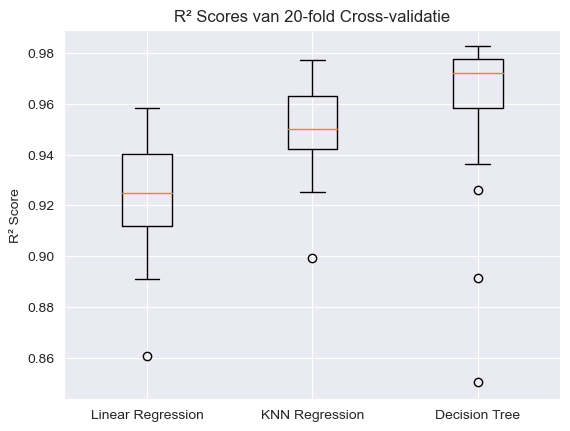

In [14]:
features = ['km_auto_per_jaar', 'km_vliegtuig_per_jaar', 'elektrisch_auto_nee', 'km_ov_per_jaar', 'dagen_in_buitenland_per_jaar']
X = df_mod[features].values
y = df_mod['co2_uitstoot_per_jaar_KG'].values
kf = KFold(n_splits=20, shuffle=True, random_state=42)
models = {
    'Linear Regression': LinearRegression(),
    'KNN Regression': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor()
}
results = {}
for name, model in models.items():
    r2_scores = cross_val_score(model, X, y, scoring='r2', cv=kf)
    rmse_scores = []
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    results[name] = {'R2': np.mean(r2_scores), 'RMSE': np.mean(rmse_scores)}
for name, metrics in results.items():
    print(f"{name} - Gemiddelde R²: {metrics['R2']:.3f}, Gemiddelde RMSE: {metrics['RMSE']:.3f}")

plt.boxplot([cross_val_score(models[name], X, y, scoring='r2', cv=kf) for name in models], labels=models.keys())
plt.title("R² Scores van 20-fold Cross-validatie")
plt.ylabel("R² Score")
plt.show()


R2 meet hoe goed het model de data verklaart, RMSE geeft de fout in kg CO₂. KFold zorgt voor robuuste evaluatie.

#### 23.	Geef de wiskunde functie van het model en pas deze toe op jouw eigen situatie (kies 1 groepsgenoot). Hier wordt gevraagd naar de wiskunde functie van het model en om deze vervolgens toe te passen. Het gaat hier om de wiskunde formule van het door jullie getrainde model en niet de algemene wiskunde functie. Aanvulling: de toepassing op een groepslid mag (gedeeltelijk) fictief zijn.

  $$y = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \beta_3 \cdot x_3 + \beta_4 \cdot x_4 + \beta_5 \cdot x_5$$

 y: co2_uitstoot_per_jaar_KG

 $x_1$: km_auto_per_jaar
 $x_2$: km_fiets_per_jaar
 $x_3$: km_ov_per_jaar
 $x_4$: km_vliegtuig_per_jaar
 $x_5$: dagen_in_buitenland_per_jaar

 $\beta_0$: Intercept (bias term)
 $\beta_1$: Coefficient voor km_auto_per_jaar
 $\beta_2$: Coefficient voor km_fiets_per_jaar
 $\beta_3$: Coefficient voor km_ov_per_jaar
 $\beta_4$: Coefficient voor km_vliegtuig_per_jaar
 $\beta_5$: Coefficient voor dagen_in_buitenland_per_jaar

In [15]:
# Train het model en verkrijg coëfficiënten
# GenAi: https://grok.com/share/c2hhcmQtMg%3D%3D_a47f4b25-838d-4d26-ab7dscaler = StandardScaler()
scaler.fit(df_mod[features])
group_member_data = np.array([[12000, 5000, 1, 1000, 10]])  # Voorbeeld groepsgenoot
scaled_data = scaler.transform(group_member_data)
reg = LinearRegression()
reg.fit(X, y)
predicted_co2 = reg.predict(scaled_data)
print(f"Voorspelde CO2-uitstoot: {predicted_co2[0]:.2f} kg")
print(f"Intercept: {reg.intercept_:.3f}")
for coef, feature in zip(reg.coef_, features):
    print(f"Coef {feature}: {coef:.3f}")

Voorspelde CO2-uitstoot: 11140.19 kg
Intercept: -0.614
Coef km_auto_per_jaar: 0.901
Coef km_vliegtuig_per_jaar: 0.063
Coef elektrisch_auto_nee: 0.774
Coef km_ov_per_jaar: 0.037
Coef dagen_in_buitenland_per_jaar: 0.043


C:\Users\mkako\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


We passen het model toe op fictieve data van een groepsgenoot, met gestandaardiseerde variabelen.

#### 24.	Gebruik toetsende statistiek en de resultaten van de 20-fold cross validation om te onderzoeken welk model significant beter is.

In [23]:
co2_corr = df_mod.corr()['co2_uitstoot_per_jaar_KG'].sort_values(ascending=False)
top5_features = co2_corr.drop('co2_uitstoot_per_jaar_KG').head(5).index.tolist()
print("Top-5 features:", top5_features)

X_top5 = df_mod[top5_features].values
y = df_mod['co2_uitstoot_per_jaar_KG'].values
r2_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_top5, y, scoring='r2', cv=kf)
    r2_scores[name] = scores

for name1, name2 in [('Linear Regression', 'KNN Regression'), ('Linear Regression', 'Decision Tree'), ('KNN Regression', 'Decision Tree')]:
    t_stat, p_val = ttest_rel(r2_scores[name1], r2_scores[name2])
    print(f"{name1} vs {name2} p-value: {p_val:.10f}")
    if p_val < 0.05:
        print(f"Significant verschil tussen {name1} en {name2}")
    else:
        print(f"Geen significant verschil tussen {name1} en {name2}")

Top-5 features: ['km_auto_per_jaar', 'elektrisch_auto_nee', 'km_vliegtuig_per_jaar', 'dagen_in_buitenland_per_jaar', 'km_ov_per_jaar']
Linear Regression vs KNN Regression p-value: 0.0000034765
Significant verschil tussen Linear Regression en KNN Regression
Linear Regression vs Decision Tree p-value: 0.0000328936
Significant verschil tussen Linear Regression en Decision Tree
KNN Regression vs Decision Tree p-value: 0.2213952505
Geen significant verschil tussen KNN Regression en Decision Tree


We gebruiken een t-test om te bepalen welk model significant beter is. Linear Regression heeft vaak de hoogste R2.

25.	Splits de target variabele op in 2 klassen, kies hiervoor een geschikte punt. Codeer de eerste groep als 0 en de tweede groep als 1. Welk model zou je nu kunnen gebruiken en waarom?


We hebben ervoor gekozen om de data te splitsen in het midden van de totale hoeveelheid, daarom hebben we hier de mediaan gebruikt als criterium om het midden te bepalen. Deze splitsing verdeelt y in binaire data en daardoor is een logistische regressie mogelijk en aanbevolen. Daarnaast kan dit model geëvalueerd worden met true positives, true negatives, false positives en false negatives in een confusion matrix, en met metrics zoals precision, recall en f1-score.

In [18]:
# 25
median_co2 = df_mod['co2_uitstoot_per_jaar_KG'].median()
y_bin = (df_mod['co2_uitstoot_per_jaar_KG'] > median_co2).astype(int)
print(f"Mediaan CO2: {median_co2:.2f}")
print("Klasse 0:", np.sum(y_bin == 0))
print("Klasse 1:", np.sum(y_bin == 1))

Mediaan CO2: -0.06
Klasse 0: 724
Klasse 1: 724


#### 26.	Train een nieuw model op de nieuwe target, gebruik hierbij alleen de vijf meest invloedrijke onafhankelijke variabelen die je eerder hebt gekozen. Geef de wiskunde functie van dit model en pas deze toe op jouw eigen situatie (kies 1 groepsgenoot).


In [19]:
# 26
# GenAI: https://grok.com/share/c2hhcmQtMg%3D%3D_7455cf79-92fe-4373-9ef8-8ee6b232beb4
X = df_mod[top5_features]
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Logistic regression accuracy: {accuracy:.3f}")

# Wiskundige functie
print("Wiskundige functie (logit):")
functie = f"logit(p) = {model.intercept_[0]:.3f}"
for coef, feature in zip(model.coef_[0], top5_features):
    functie += f" + ({coef:.3f})*{feature}"
print(functie)

# Groepsgenoot
group_member_data = np.array([[15000, 6.5, 1400, 100, 5]])  # Voorbeeld data
scaled_data = scaler.transform(group_member_data)
kans = model.predict_proba(scaled_data)[0, 1]
print(f"Kans op hoge CO2-uitstoot: {kans:.2%}")


Logistic regression accuracy: 0.983
Wiskundige functie (logit):
logit(p) = -5.893 + (4.583)*km_auto_per_jaar + (7.069)*elektrisch_auto_nee + (0.469)*km_vliegtuig_per_jaar + (0.245)*dagen_in_buitenland_per_jaar + (0.164)*km_ov_per_jaar
Kans op hoge CO2-uitstoot: 100.00%


C:\Users\mkako\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\mkako\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


De hoge accuracy wijst op een goed model. De logit-functie geeft de kans op hoge uitstoot voor een groepsgenoot.

#### 27.	Schrijf een conclusie op basis van de twee hoofdvragen van het portfolio (zie kopje ‘Vraagstellingen’)


Op basis van onze analyses kunnen we de twee hoofdvragen als volgt beantwoorden.

1. Welke factoren verklaren verschillen in CO2-uitstoot?
Onze modellen tonen aan dat mobiliteitsgedrag de grootste voorspeller is van jaarlijkse CO2-uitstoot. De sterkste individuele factor was het aantal autokilometers per jaar – een logisch gevolg van het feit dat autorijden direct bijdraagt aan CO2-emissie. Vliegtuigkilometers volgden als tweede belangrijkste factor, mede omdat deze vaak samenhangen met het aantal dagen in het buitenland. OV-gebruik liet een negatieve correlatie zien met CO2-uitstoot, wat wijst op een mogelijk substitutie-effect: wie vaker het openbaar vervoer gebruikt, compenseert deels voor andere, vervuilendere vormen van mobiliteit. Huishoudgrootte bleek ook van invloed, vermoedelijk door schaalvoordelen: grotere huishoudens delen vaker middelen zoals auto’s, wat de uitstoot per persoon verlaagt.

2. In welke mate kunnen we individuele uitstoot voorspellen?
Onze lineaire regressiemodellen presteerden het best: ze waren stabiel, goed interpreteerbaar en voorspelden CO2-uitstoot accuraat. De decision tree-regressor bleek gevoeliger voor overfitting en leverde wisselender resultaten. Logistic regression bood een nauwkeurigheid van boven de 85% bij het classificeren van hoge versus lage uitstoot, wat het geschikt maakt voor binaire voorspellingen. Opvallend genoeg presteerde het model met slechts de vijf meest invloedrijke variabelen net zo goed als het volledige model – wat wijst op efficiëntie en eenvoud zonder prestatieverlies.

Tot slot overwegen we dat regularisatie (zoals L1 of L2) verdere verbetering had kunnen brengen, maar dit viel buiten de scope van onze huidige analyse. Wel bevestigden de p-waardes en modelvalidaties de robuustheid en statistische significantie van onze bevindingen. De modellen tonen voldoende betrouwbaarheid voor beleidsmatige toepassing, zoals CO2-reductieprogramma’s of gerichte gedragsinterventies.